[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mouni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


📰 Total Articles Fetched: 98
✅ Data saved to 'news_data.csv'


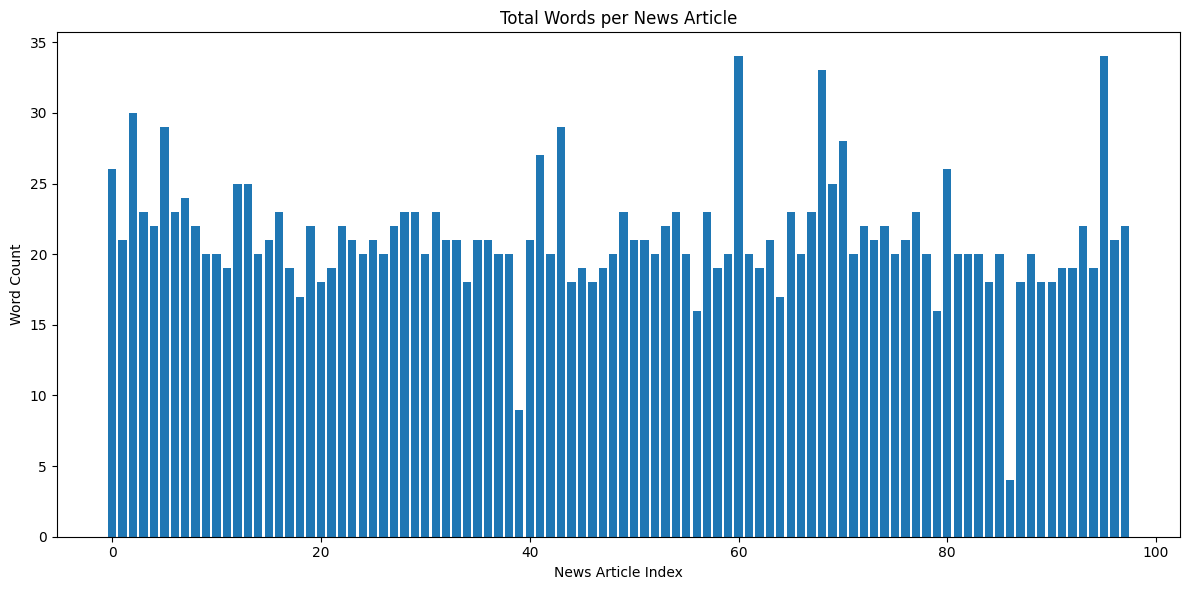

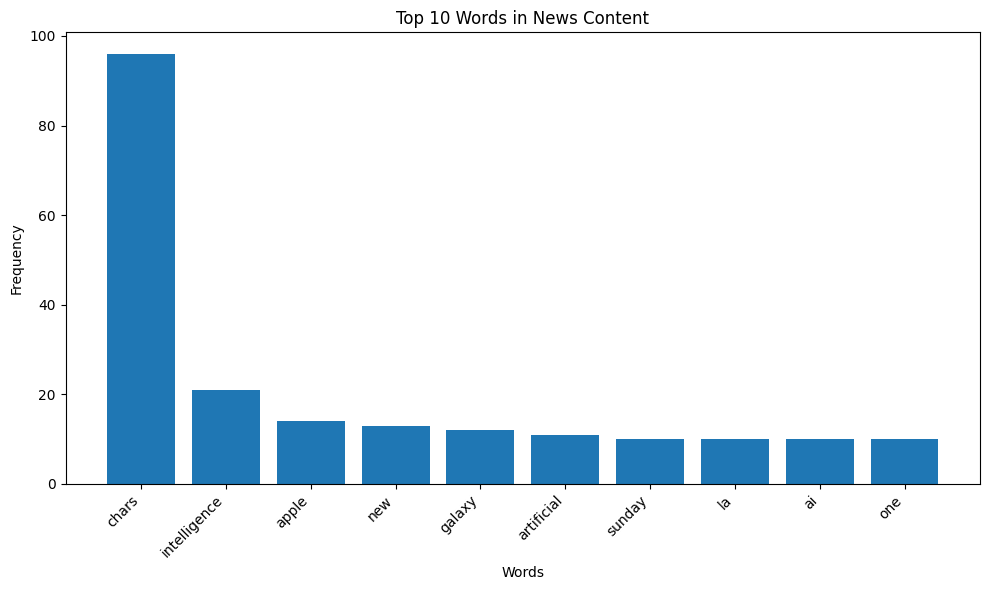

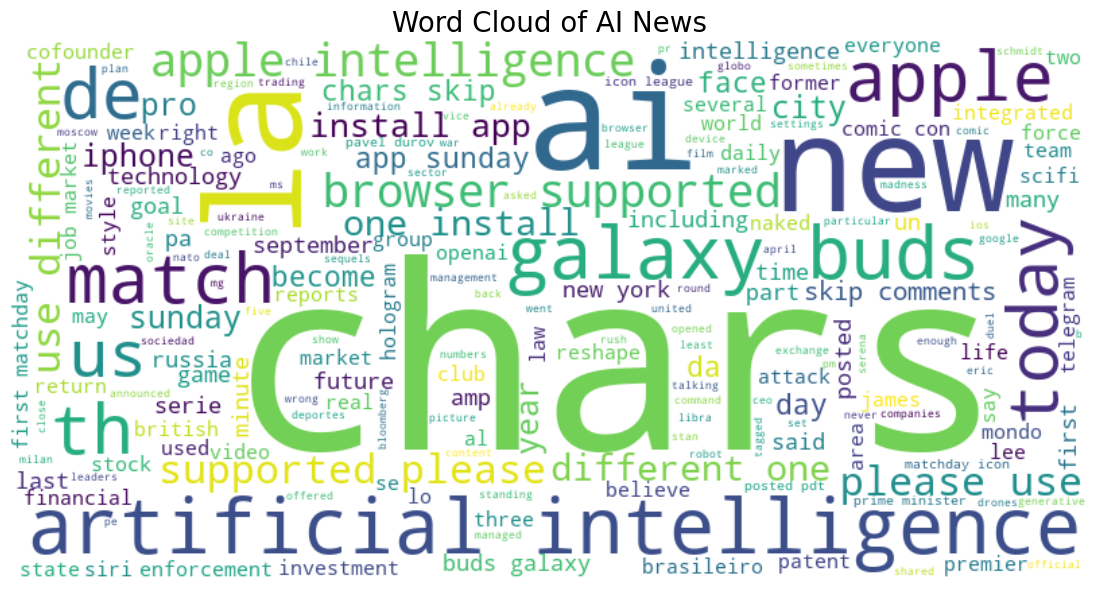

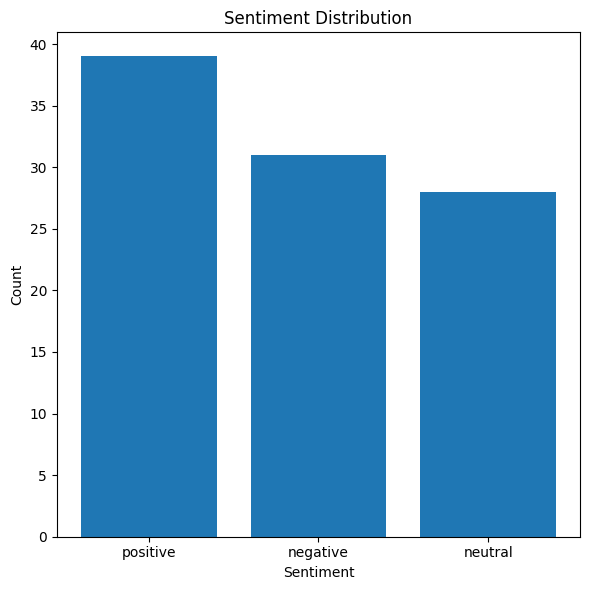


✅ Data saved to 'news_data_with_sentiment.csv'


In [1]:
# 📦 Import Libraries
import requests
import pandas as pd
import re
from datetime import datetime, timedelta
from collections import Counter
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 📥 Download NLTK Stopwords
nltk.download('stopwords')

# 🔑 API Setup
API_KEY = '921bb460935443fc8236ac58e9371eb6'
ENDPOINT = 'https://newsapi.org/v2/everything'
QUERY = 'AI OR artificial intelligence'
FROM_DATE = (datetime.now() - timedelta(days=30)).strftime('%Y-%m-%d')

# 📡 Fetch News Data
params = {
    'q': QUERY,
    'from': FROM_DATE,
    'sortBy': 'publishedAt',
    'apiKey': API_KEY,
    'pageSize': 100
}

try:
    response = requests.get(ENDPOINT, params=params, timeout=10)
    response.raise_for_status()
except requests.exceptions.RequestException as e:
    print("❌ API request failed:", e)
    exit()

data = response.json()
articles = data.get('articles', [])
print(f"📰 Total Articles Fetched: {len(articles)}")
if len(articles) == 0:
    exit("No articles found for this query.")

# 🧾 Convert JSON to DataFrame
df = pd.DataFrame(articles)
df.to_csv('news_data.csv', index=False)
print("✅ Data saved to 'news_data.csv'")

# 🧼 Text Preprocessing
def clean_text(text):
    text = re.sub(r"http\S+|[^a-zA-Z\s]", "", text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(tokens)

df['cleaned_content'] = df['content'].fillna('').apply(clean_text)

# 📝 Total Words per Article
df['total_words'] = df['cleaned_content'].apply(lambda x: len(x.split()))

# 📊 Display Total Words per News Article
plt.figure(figsize=(12,6))
plt.bar(range(len(df)), df['total_words'])
plt.title('Total Words per News Article')
plt.xlabel('News Article Index')
plt.ylabel('Word Count')
plt.tight_layout()
plt.show()


# 📊 Display Top 10 Words
all_words = " ".join(df['cleaned_content']).split()
top_words = Counter(all_words).most_common(10)

words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.title('Top 10 Words in News Content')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 🌐 Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['cleaned_content']))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of AI News', fontsize=20)
plt.show()

# 😊 Sentiment Analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_score'] = df['cleaned_content'].apply(get_sentiment)
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral'
)

# 📊 Display Sentiment Distribution
sentiment_counts = df['sentiment_label'].value_counts()
plt.figure(figsize=(6,6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 📤 Save Final Data
df.to_csv('news_data_with_sentiment.csv', index=False)
print("\n✅ Data saved to 'news_data_with_sentiment.csv'")
